In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("california-homelessness-prediction-challenge/train.csv")

train_data.head()

,ID,HOMELESS_RATE,AGE_U18_PCT,AGE_18_24_PCT,AGE_25_34_PCT,AGE_35_44_PCT,AGE_45_54_PCT,AGE_55_59_PCT,AGE_60_61_PCT,AGE_62_64_PCT,...,NONVETERAN_POP_PCT,DISABILITY_POP_PCT,NODISABILITY_POP_PCT,TOTAL_HOUSEHOLDS_PCT,FAMILY_HH_TOTAL,FAMILY_HH_CHILD_LT18_PCT,NONFAMILY_SINGLE_MALE_PCT,NONFAMILY_SINGLE_FEMALE_PCT,MULTI_PERSON_NONFAMILY_HH_PCT,INDIVIDUALS_NOT_IN_FAMILY_UNITS_PCT
0,SC_05,0.000000,0.388210,0.054130,0.058164,0.061302,0.161269,0.062087,0.037431,0.051104,...,0.771265,0.460607,0.020397,0.305727,0.251373,0.076544,0.174829,0.054354,0.021966,0.054354
1,RV_08,0.000999,0.368737,0.089002,0.132744,0.137555,0.156465,0.082081,0.031715,0.035453,...,0.766820,0.457923,0.023203,0.227111,0.184183,0.064947,0.119236,0.042928,0.016283,0.042928
2,SC_10,0.004736,0.429991,0.071720,0.204073,0.176398,0.127522,0.046399,0.020886,0.025102,...,0.767663,0.517711,0.030974,0.237949,0.198297,0.094440,0.103857,0.039651,0.014248,0.039651
3,AL_12,0.001269,0.476342,0.058899,0.115471,0.156583,0.147944,0.064417,0.027537,0.032103,...,0.731965,0.498431,0.023747,0.272830,0.234998,0.118750,0.116247,0.037832,0.013240,0.037832
4,SAC_04,0.000394,0.513634,0.078841,0.112881,0.145494,0.148405,0.066102,0.024644,0.029827,...,0.700749,0.485158,0.029264,0.249969,0.189581,0.093464,0.096118,0.060387,0.016156,0.060387


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Separate features and target
X = train_data.drop(columns=['HOMELESS_RATE', 'ID'])
y = train_data['HOMELESS_RATE']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
                                    )

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
preds = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R²: -2.4414132435474922
MSE: 2.7151152492200523e-05
RMSE: 0.005210676778711238


In [5]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. R² scores
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# 5. MSE scores (negative by default, so we multiply by -1)
mse_scorer = make_scorer(mean_squared_error)
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# 6. RMSE scores
rmse_scores = np.sqrt(mse_scores)

# 7. Print averages
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))

Average R²: -0.9278398223218556
Average MSE: 5.448728590891008e-05
Average RMSE: 0.007004674134671064


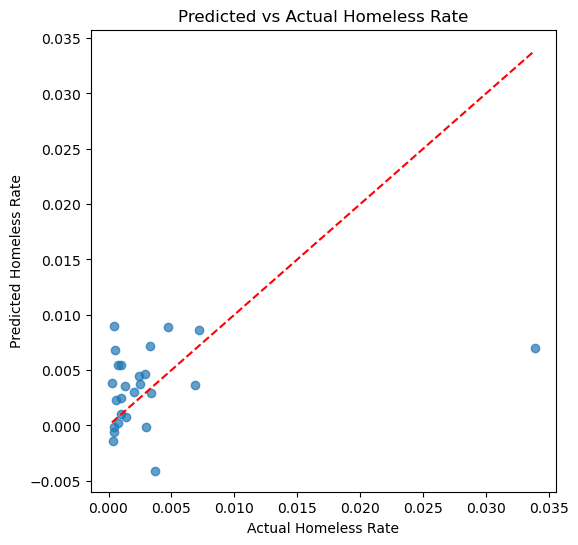

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Homeless Rate")
plt.ylabel("Predicted Homeless Rate")
plt.title("Predicted vs Actual Homeless Rate")
plt.show()

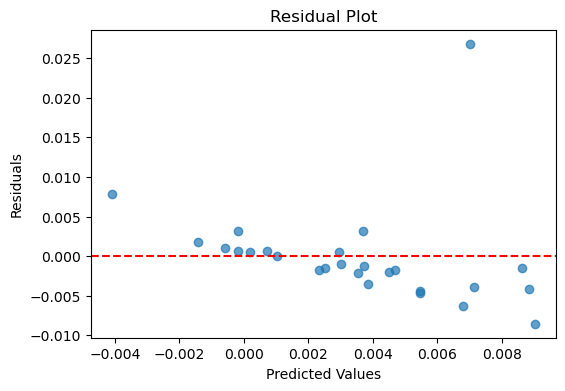

In [74]:
residuals = y_test - preds

plt.figure(figsize=(6,4))
plt.scatter(preds, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [76]:
test_data = pd.read_csv("california-homelessness-prediction-challenge/test.csv")

X_ids = test_data['ID']
test_X = test_data.drop(columns=['ID'])

test_preds = model.predict(test_X)

results = pd.DataFrame({
    'ID': X_ids,          
    'HOMELESS_RATE': test_preds
})

results.to_csv('homeless_predictions.csv', index=False)